## Analysis of runtimes and model performances for different parameter tuning search strategies by varying feature set size

## Additionally, we plot the performance of 9 feature selection methods with EN against each other. 

## Description: 
### This script outlines an analysis of runtimes and model performance for different parameter tuning search strategies by varying feature set size - this can be used to select the most suitable method when designing experiments and planning computational resources. 
### Additionally, the plots of the 9 feature selection methods can be assessed to choose the optimal number of features to use. This applies in the case of the 4 feature ranking methods as the other 5 methods automatically choose the number of features. Choosing the best no. of features based on the trends from the graphs is essentially the same as hyperparameter tuning. Even though we're choosing it based on the test sets of the nested CV, as we have external validation data (test sets), these are not involved in selecting the no. of features.  

### Author: Trevor Doherty

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdb import set_trace
from scipy.stats import sem
plt.rcParams["figure.figsize"] = (26,18)

## Part 1: Comparison of hyperparameter tuning search strategies in terms of run times and performance

### Read in results data

In [2]:
data_gs = pd.read_csv('data/run_results_experiment2_GridSearchCV.csv')
data_rs = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV.csv')
data_hs = pd.read_csv('data/run_results_experiment2_HalvingGridSearchCV.csv')
data_hs_rmse = pd.read_csv('data/run_results_experiment2_HalvingGridSearchCV_rmse.csv')
data_bs = pd.read_csv('data/run_results_experiment2_BayesSearchCV.csv')
data_encv = pd.read_csv('data/run_results_experiment2_ElasticNetCV_rmse.csv')

In [3]:
data_hs_rmse = data_hs_rmse[data_hs_rmse['Original Features'] != 144000]

### Sum the runtimes over the 5 nested CV runs for each search strategy

In [4]:
searches = [(data_gs, 'GridSearch'), (data_rs, 'RandomizedSearch'), (data_hs, 'HalvingSearch'),
            (data_bs, 'BayesSearch'), (data_encv, 'ElasticNetCV')] # (data_hs_rmse, 'HalvingSearch_RMSE'),
time_dfs = []
for search in searches:
    time_dfs.append(search[0].groupby('Original Features')['Time'].sum()/3600)
cols = ['Original Features'] + [x[1] for x in searches]
time_df = pd.concat(time_dfs, axis=1).reset_index()
time_df.columns = cols
time_df

,Original Features,GridSearch,RandomizedSearch,HalvingSearch,BayesSearch,ElasticNetCV
0,1000,2.817847,0.423228,0.209586,1.405963,4.435594
1,4000,11.262664,0.688116,0.332821,12.863299,14.922620
2,8000,22.223660,2.882738,0.529224,44.888864,23.765334
3,16000,41.186438,5.639959,4.232558,98.500346,36.532276
4,32000,63.949406,9.530892,11.748404,183.664643,53.075100
5,72000,141.654552,27.513374,17.130469,370.696913,79.389200
6,144000,NaN,NaN,NaN,NaN,53.435858


### Plot the runtimes for each search strategy over the range of tested feature sizes

### Note: Models have not finished for GridSearch and BayesSearch, once finished - runtimes will be longer than those shown in the graph below for these 2 tuning methods

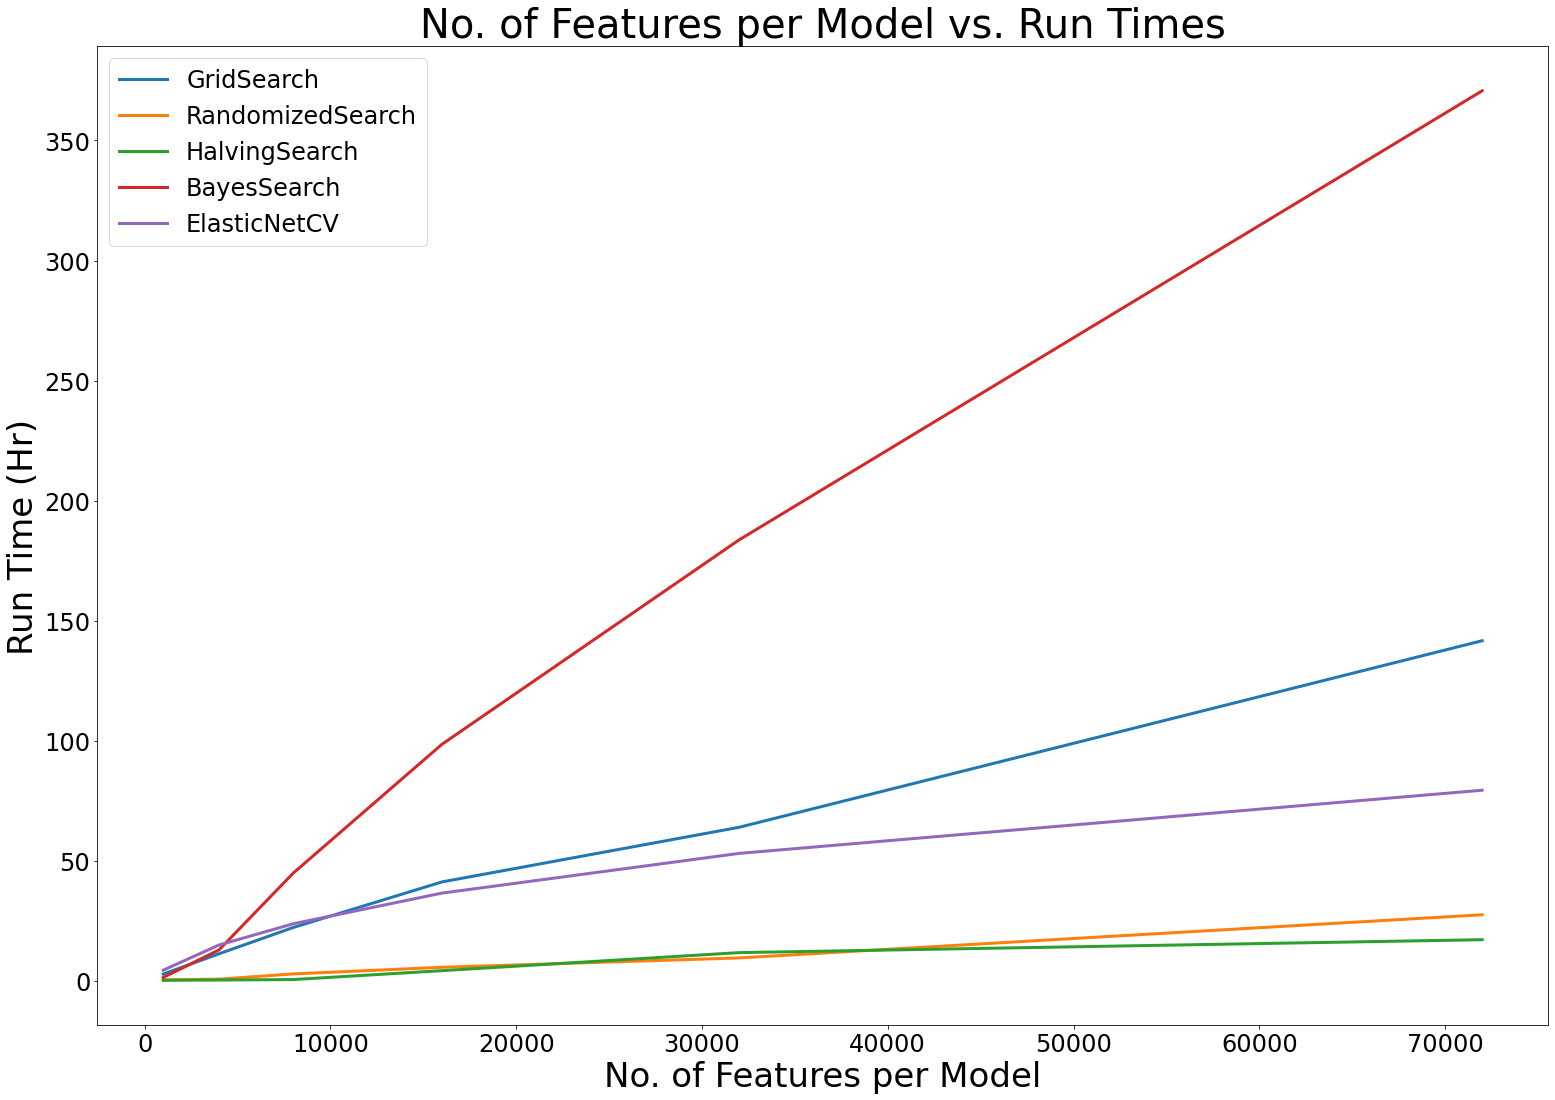

In [5]:
time_df.iloc[0:6,:].plot(x='Original Features', y=['GridSearch', 'RandomizedSearch', 'HalvingSearch',
                                                   'BayesSearch', 'ElasticNetCV'], linewidth=3) # 'HalvingSearch_RMSE',
plt.title('No. of Features per Model vs. Run Times', fontsize=40)
plt.xlabel('No. of Features per Model', fontsize=34)
plt.ylabel('Run Time (Hr)', fontsize=34)
plt.xticks(fontsize=24); plt.yticks(fontsize=24)
plt.legend(fontsize=24)

### Calculate the average MAE over the 5 nested CV runs for each search strategy

In [6]:
mae_dfs = []
for search in searches:
    mae_dfs.append(search[0].groupby('Original Features')['Test MAE Per Run'].mean())
cols = ['Original Features'] + [x[1] for x in searches]
mae_df = pd.concat(mae_dfs, axis=1).reset_index()
mae_df.columns = cols
mae_df

,Original Features,GridSearch,RandomizedSearch,HalvingSearch,BayesSearch,ElasticNetCV
0,1000,0.271843,0.280133,0.280016,0.271843,0.272152
1,4000,0.275041,0.272426,0.279740,0.275041,0.274356
2,8000,0.279437,0.286745,0.280767,0.279437,0.278967
3,16000,0.273462,0.288212,0.280226,0.273462,0.273872
4,32000,0.274362,0.282649,0.280605,0.274362,0.276785
5,72000,0.268408,0.279224,0.272731,0.268408,0.278579
6,144000,NaN,NaN,NaN,NaN,0.283641


### Plot the average MAE (i.e. over the 5 test sets of the nested CV) for each search strategy over the range of tested feature sizes

(0.25, 0.3)

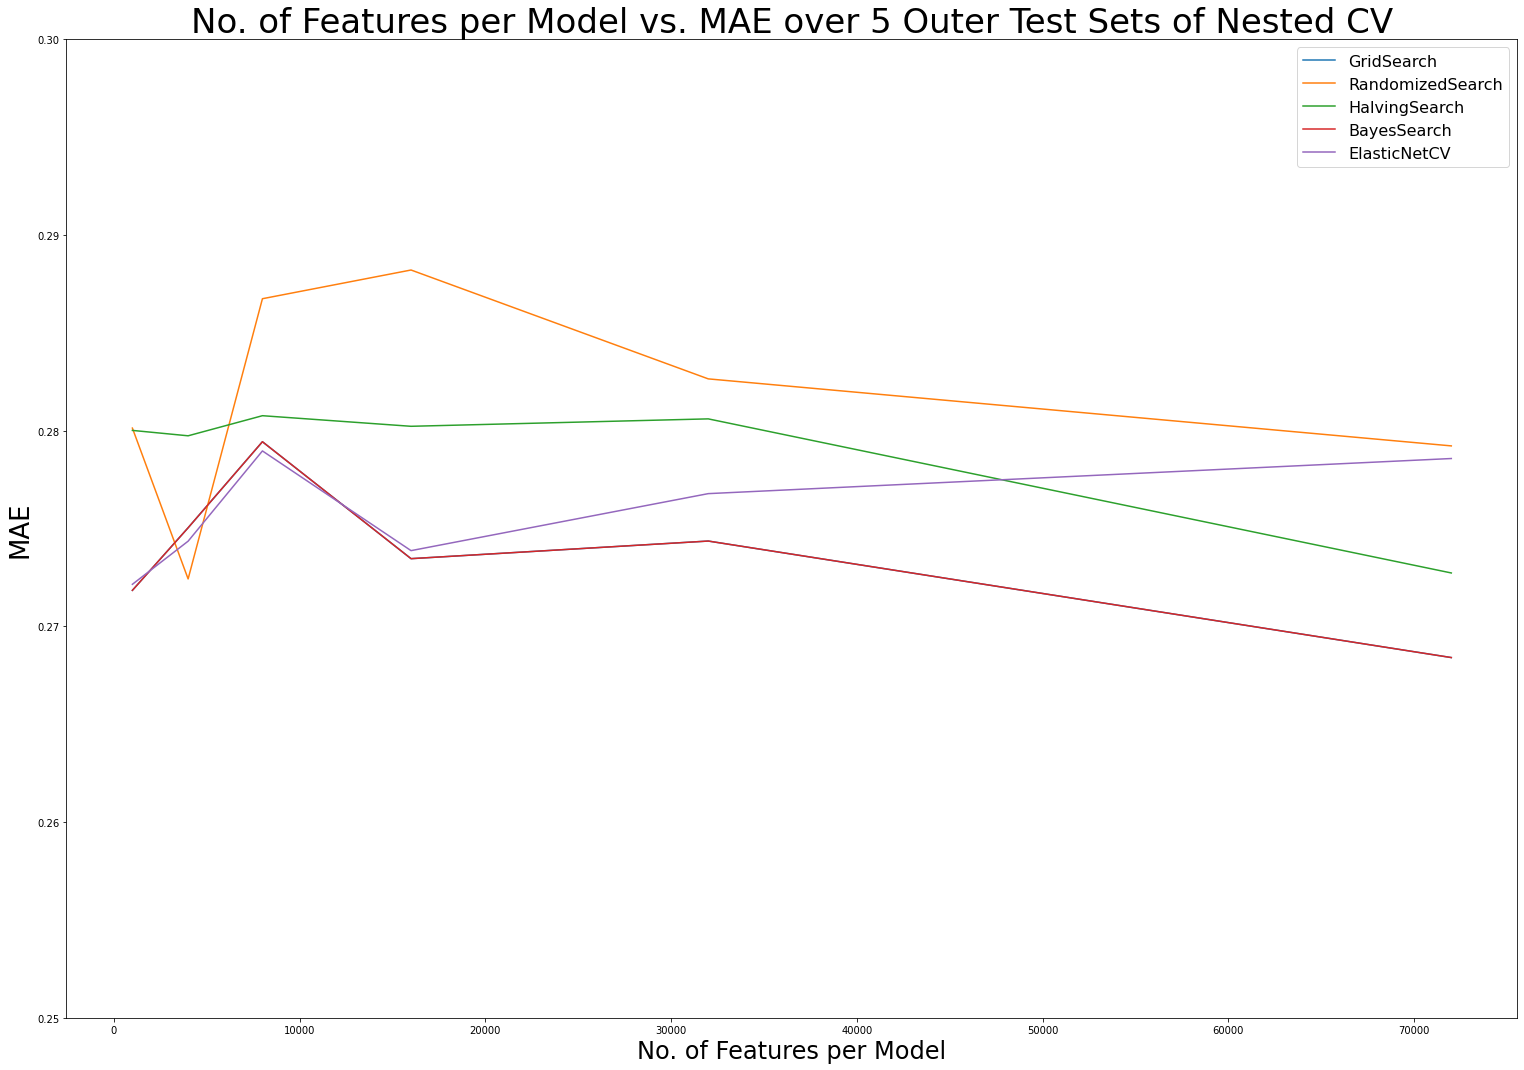

In [7]:
mae_df.iloc[0:6, :].plot(x='Original Features', y=['GridSearch', 'RandomizedSearch', 'HalvingSearch',
                                                   'BayesSearch', 'ElasticNetCV'])
plt.title('No. of Features per Model vs. MAE over 5 Outer Test Sets of Nested CV', fontsize=34)
plt.xlabel('No. of Features per Model', fontsize=24)
plt.ylabel('MAE', fontsize=26)
plt.legend(fontsize=16)
plt.ylim(0.25, 0.3)

## Part 2: Comparison of feature ranking methods with Elastic Net using the selected parameter tuning search strategy from Part 1.

### Read in results data

In [8]:
# Read in results data
#data_rs_20000 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_rmse_20000.csv', index_col=0)
rs_20000_pearsonr = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_pearsonr_iter75.csv', index_col=0)
rs_20000_mig = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_mutualinfogain_iter75.csv', index_col=0)
rs_20000_pearsonr_pt2 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_pearsonr_iter75_part2.csv', index_col=0)
rs_20000_mig_pt2 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_mutualinfogain_iter75_part2.csv', index_col=0)
rs_20000_pearsonr_pt3 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_pearsonr_iter75_part3.csv', index_col=0)
rs_20000_mig_pt3 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_mutualinfogain_iter75_part3.csv', index_col=0)
rs_20000_linearSVR = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_LinearSVR_iter75.csv', index_col=0)
rs_20000_linearSVR_pt2 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_LinearSVR_iter75_part2.csv', index_col=0)
rs_20000_omp = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_omp_iter75_part3.csv', index_col=0)
rs_20000_rf = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_randomforest_iter75.csv', index_col=0)
rs_20000_rf_pt2 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_randomforest_iter75_part2_2.csv', index_col=0)
rs_20000_rf_pt3 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_randomforest_iter75_part3.csv', index_col=0)
rs_20000_rf_pt4 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_randomforest_iter75_part4.csv', index_col=0)
rs_20000_rf_pt5 = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_randomforest_iter75_part5.csv', index_col=0)


# Combine part1 and part2 results
rs_20000_pearsonr = pd.concat([rs_20000_pearsonr, rs_20000_pearsonr_pt2, rs_20000_pearsonr_pt3])
rs_20000_mig = pd.concat([rs_20000_mig, rs_20000_mig_pt2, rs_20000_mig_pt3])
rs_20000_linearSVR = pd.concat([rs_20000_linearSVR, rs_20000_linearSVR_pt2])
rs_20000_rf = pd.concat([rs_20000_rf, rs_20000_rf_pt2, rs_20000_rf_pt3, rs_20000_rf_pt4, rs_20000_rf_pt5])

rs_ftestfdr_1pc = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_ftestfdr_iter75.csv', index_col=0)
rs_ftestfdr_5pc = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_ftestfdr0.05_iter75.csv', index_col=0)
rs_boostaroota = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_boostaroota_iter75.csv', index_col=0)
rs_pca = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_pca_iter75.csv', index_col=0)
#rs_baseline = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_baseline_iter75.csv', index_col=0)
rs_baseline = pd.read_csv('data/run_results_experiment2_RandomizedSearchCV_baseline_iter75_2.csv', index_col=0)


searches = [(rs_20000_pearsonr, 'Pearson r'), #(data_rs_20000, 'RS Pearsonr'), (data_hs_20000_pearsonr, 'HS Pearsonr')
            (rs_20000_mig, 'Mutual Information'),
            (rs_20000_linearSVR, 'Linear SVR Rankings'),
            (rs_20000_omp, 'OMP Rankings'),
            (rs_20000_rf, 'RF Importances')
            ]
mae_dfs = []
for search in searches:
    mae_dfs.append(search[0].groupby('Original Features')['Test MAE Per Run'].mean())

en_features = []    
for search in searches:
    en_features.append(search[0].groupby('Original Features')['Non-zero Coefs after EN'].mean())

cols = ['Original Features'] + [x[1] for x in searches]
mae_df = pd.concat(mae_dfs, axis=1).reset_index()
mae_df.columns = cols
print(mae_df.head(85))

en_features_df = pd.concat(en_features, axis=1).reset_index()
en_features_df.columns = cols
print(en_features_df.head(85))

    Original Features  Pearson r  Mutual Information  Linear SVR Rankings  \
0                  50   0.273603            0.273069             0.294675   
1                 100   0.273974            0.272530             0.298147   
2                 150   0.273621            0.272419             0.296492   
3                 200   0.272108            0.272052             0.290495   
4                 250   0.271730            0.271549             0.286281   
..                ...        ...                 ...                  ...   
79              19000   0.274815            0.278003             0.277582   
80              19250   0.271614            0.272584             0.278100   
81              19500   0.272165            0.274726             0.278428   
82              19750   0.271420            0.274785             0.278442   
83              20000   0.273095            0.271933             0.278125   

    OMP Rankings  RF Importances  
0       0.282554        0.272673  
1    

In [9]:
mae_df

,Original Features,Pearson r,Mutual Information,Linear SVR Rankings,OMP Rankings,RF Importances
0,50,0.273603,0.273069,0.294675,0.282554,0.272673
1,100,0.273974,0.272530,0.298147,0.285817,0.271974
2,150,0.273621,0.272419,0.296492,0.292107,0.273000
3,200,0.272108,0.272052,0.290495,0.296918,0.274138
4,250,0.271730,0.271549,0.286281,0.300815,0.275864
...,...,...,...,...,...,...
79,19000,0.274815,0.278003,0.277582,NaN,0.273703
80,19250,0.271614,0.272584,0.278100,NaN,0.273549
81,19500,0.272165,0.274726,0.278428,NaN,0.274029
82,19750,0.271420,0.274785,0.278442,NaN,0.274136


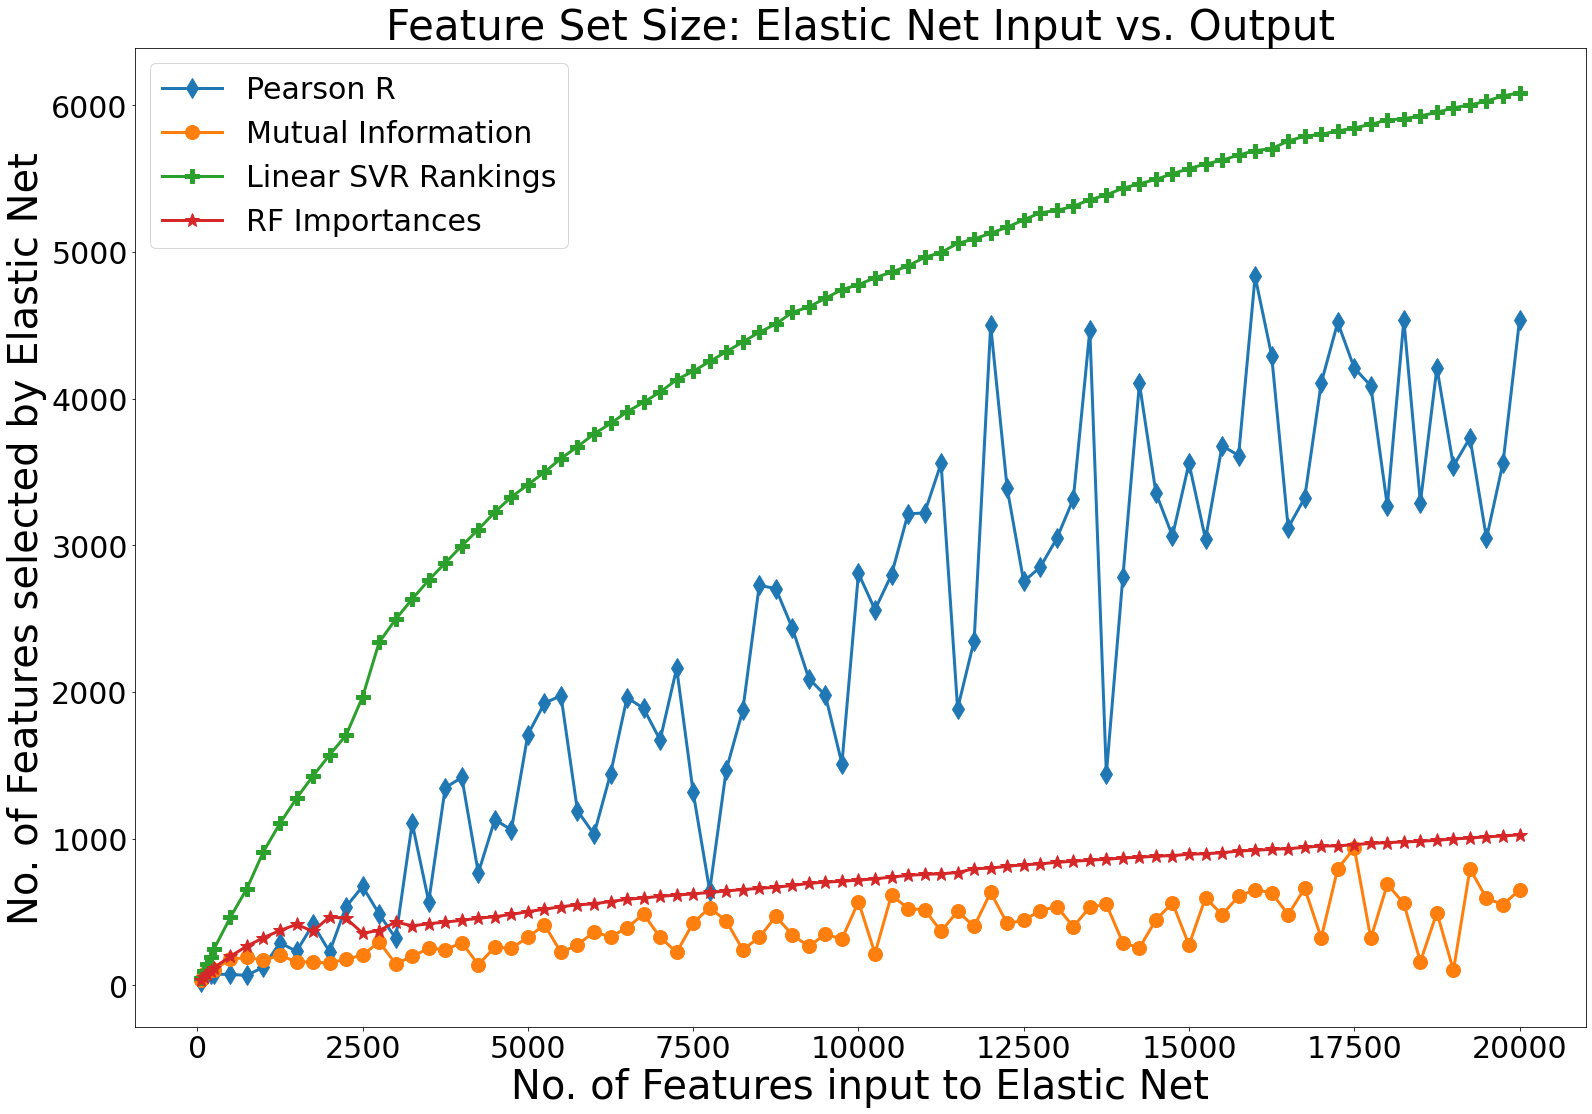

In [10]:
fig,ax = plt.subplots()
plt.plot(en_features_df['Original Features'], en_features_df['Pearson r'], linewidth=3, marker='d', markersize=14, label='Pearson R')
plt.plot(en_features_df['Original Features'], en_features_df['Mutual Information'], linewidth=3, marker='o', markersize=14, label='Mutual Information')
plt.plot(en_features_df['Original Features'], en_features_df['Linear SVR Rankings'], linewidth=3, marker='P', markersize=14, label='Linear SVR Rankings')
plt.plot(en_features_df['Original Features'], en_features_df['RF Importances'], linewidth=3, marker='*', markersize=14, label='RF Importances')
plt.title('Feature Set Size: Elastic Net Input vs. Output', fontsize=42)
plt.xlabel('No. of Features input to Elastic Net', fontsize=40)
plt.ylabel('No. of Features selected by Elastic Net', fontsize=40)
plt.legend(fontsize=16)
plt.xticks(fontsize=30); plt.yticks(fontsize=30)
plt.legend(fontsize=30, loc='upper left')




In [11]:
rs_20000_rf

,Test MAE Per Run,Test RMSE Per Run,Test MAPE Per Run,Test Corr Per Run,5-fold Inner CV MAE Per Run,Original Features,Top N Ranked Features,Non-zero Coefs after EN,Best Alpha,Best l1 ratio,Time,Run,Feat Sel
0,0.270138,0.126853,26.168697,0.200829,-0.119624,50,50,31,0.0010,0.20,35.798780,Run 1,"('random_forest', 0)"
1,0.284846,0.126139,33.445536,0.262834,-0.124823,50,50,26,0.0010,0.30,27.395265,Run 2,"('random_forest', 0)"
2,0.259954,0.107296,28.300127,0.190809,-0.124993,50,50,33,0.0010,0.20,27.847003,Run 3,"('random_forest', 0)"
3,0.274459,0.132556,27.153858,0.317520,-0.117804,50,50,34,0.0010,0.20,29.224548,Run 4,"('random_forest', 0)"
4,0.273969,0.124196,26.220571,0.325565,-0.116797,50,50,50,0.0001,0.10,27.467672,Run 5,"('random_forest', 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.272854,0.127790,26.586359,0.201475,-0.124714,20000,20000,1033,0.0100,0.05,3248.314993,Run 1,"('random_forest', 0)"
1,0.278827,0.120858,32.753660,0.343227,-0.122624,20000,20000,1036,0.0100,0.05,3589.287575,Run 2,"('random_forest', 0)"
2,0.262390,0.108226,28.347132,0.198090,-0.132892,20000,20000,1138,0.0100,0.05,3176.225785,Run 3,"('random_forest', 0)"
3,0.276514,0.135840,27.404705,0.270813,-0.118893,20000,20000,929,0.0100,0.05,3506.707922,Run 4,"('random_forest', 0)"


In [12]:
f_test_1_pc_mae = rs_ftestfdr_1pc['Test MAE Per Run'].mean()
f_test_1_pc_feat = rs_ftestfdr_1pc['Non-zero Coefs after EN'].mean()
f_test_5_pc_mae = rs_ftestfdr_5pc['Test MAE Per Run'].mean()
f_test_5_pc_feat = rs_ftestfdr_5pc['Non-zero Coefs after EN'].mean()
boostaroota_mae = rs_boostaroota['Test MAE Per Run'].mean()
boostaroota_feat = rs_boostaroota['Non-zero Coefs after EN'].mean()
pca_mae = rs_pca['Test MAE Per Run'].mean()
pca_feat = rs_pca['Non-zero Coefs after EN'].mean()
baseline_mae = rs_baseline['Test MAE Per Run'].mean()
baseline_feat = rs_baseline['Non-zero Coefs after EN'].mean()

In [13]:
rs_ftestfdr_1pc

,Test MAE Per Run,Test RMSE Per Run,Test MAPE Per Run,Test Corr Per Run,5-fold Inner CV MAE Per Run,Original Features,Top N Ranked Features,Non-zero Coefs after EN,Best Alpha,Best l1 ratio,Time,Run,Feat Sel
0,0.267773,0.119053,25.661962,0.342325,-0.086030,427342,29132,5184,0.0010,0.05,6093.916972,Run 1,"('f_test_fdr', 0.01)"
1,0.283227,0.125734,31.875335,0.371237,-0.081389,427342,21244,4510,0.0001,0.10,6540.347370,Run 2,"('f_test_fdr', 0.01)"
2,0.279504,0.122889,30.238371,0.171031,-0.086662,427342,27211,4935,0.0010,0.05,5190.095325,Run 3,"('f_test_fdr', 0.01)"
3,0.270267,0.128578,26.695436,0.360344,-0.082014,427342,12936,3590,0.0010,0.05,2823.589713,Run 4,"('f_test_fdr', 0.01)"
4,0.285504,0.131759,26.746416,0.296106,-0.077297,427342,27901,4964,0.0010,0.05,5545.908850,Run 5,"('f_test_fdr', 0.01)"


In [14]:
rs_ftestfdr_5pc

,Test MAE Per Run,Test RMSE Per Run,Test MAPE Per Run,Test Corr Per Run,5-fold Inner CV MAE Per Run,Original Features,Top N Ranked Features,Non-zero Coefs after EN,Best Alpha,Best l1 ratio,Time,Run,Feat Sel
0,0.273382,0.130758,26.010235,0.267775,-0.083547,427342,70370,5797,0.00100,0.05,15996.054512,Run 1,"('f_test_fdr', 0.05)"
1,0.279399,0.123489,31.924416,0.366641,-0.072880,427342,45662,7894,0.00001,0.05,12239.151203,Run 2,"('f_test_fdr', 0.05)"
2,0.280724,0.120223,30.405168,0.188071,-0.077218,427342,59147,5502,0.00100,0.05,11654.726808,Run 3,"('f_test_fdr', 0.05)"
3,0.269365,0.124616,26.867022,0.389620,-0.073425,427342,32916,4720,0.00100,0.05,5659.177934,Run 4,"('f_test_fdr', 0.05)"
4,0.271201,0.124631,25.677237,0.352430,-0.079735,427342,70654,8077,0.00001,0.05,25522.842206,Run 5,"('f_test_fdr', 0.05)"


In [15]:
rs_boostaroota

,Test MAE Per Run,Test RMSE Per Run,Test MAPE Per Run,Test Corr Per Run,5-fold Inner CV MAE Per Run,Original Features,Top N Ranked Features,Non-zero Coefs after EN,Best Alpha,Best l1 ratio,Time,Run,Feat Sel
0,0.276888,0.132915,26.403146,0.219627,-0.097473,427342,655,288,0.001,0.2,905.226694,Run 1,"('boostaroota', 0.0001)"
1,0.273051,0.119783,31.229940,0.342441,-0.099644,427342,563,268,0.001,0.2,795.889444,Run 2,"('boostaroota', 0.0001)"
2,0.266755,0.117078,29.179047,0.177945,-0.107478,427342,561,253,0.001,0.2,810.522341,Run 3,"('boostaroota', 0.0001)"
3,0.287751,0.143188,28.156884,0.236651,-0.102034,427342,557,237,0.001,0.2,648.324279,Run 4,"('boostaroota', 0.0001)"
4,0.278514,0.133001,26.240972,0.268656,-0.097887,427342,586,273,0.001,0.2,791.783809,Run 5,"('boostaroota', 0.0001)"


In [16]:
rs_pca[['Top N Ranked Features', 'Non-zero Coefs after EN']].mean()
sem(rs_pca[['Non-zero Coefs after EN']])

array([9.46889645])

In [17]:
rs_baseline

,Test MAE Per Run,Test RMSE Per Run,Test MAPE Per Run,Test Corr Per Run,5-fold Inner CV MAE Per Run,Original Features,Top N Ranked Features,Non-zero Coefs after EN,Best Alpha,Best l1 ratio,Time,Run,Feat Sel
0,0.268906,0.129420,25.763052,0.220420,-0.131163,427342,427342,5,0.01,0.6,137426.534411,Run 1,"('baseline', 0.0001)"
1,0.285749,0.131797,33.880029,0.205433,-0.129397,427342,427342,18,0.01,0.5,156009.731744,Run 2,"('baseline', 0.0001)"
2,0.263877,0.109211,29.067165,0.105501,-0.136186,427342,427342,19,0.01,0.5,190401.980424,Run 3,"('baseline', 0.0001)"
3,0.288761,0.140113,28.738446,0.209236,-0.127171,427342,427342,95,0.01,0.3,129182.253343,Run 4,"('baseline', 0.0001)"
4,0.280649,0.134929,27.316956,0.183617,-0.129697,427342,427342,15,0.01,0.5,148131.281977,Run 5,"('baseline', 0.0001)"


In [18]:
mae_df

,Original Features,Pearson r,Mutual Information,Linear SVR Rankings,OMP Rankings,RF Importances
0,50,0.273603,0.273069,0.294675,0.282554,0.272673
1,100,0.273974,0.272530,0.298147,0.285817,0.271974
2,150,0.273621,0.272419,0.296492,0.292107,0.273000
3,200,0.272108,0.272052,0.290495,0.296918,0.274138
4,250,0.271730,0.271549,0.286281,0.300815,0.275864
...,...,...,...,...,...,...
79,19000,0.274815,0.278003,0.277582,NaN,0.273703
80,19250,0.271614,0.272584,0.278100,NaN,0.273549
81,19500,0.272165,0.274726,0.278428,NaN,0.274029
82,19750,0.271420,0.274785,0.278442,NaN,0.274136


## Plot the nested CV MAE for the chosen search strategy (RandomizedSearchCV) over the range 0 to 20000 features (step size: 250) for each feature ranking method

C:\Users\User\AppData\Local\Temp/ipykernel_13628/3835965873.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-kX" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(f_test_1_pc_feat, f_test_1_pc_mae, '-kX', label='F test (FDR=0.01)', markersize=20, linestyle="None")
C:\Users\User\AppData\Local\Temp/ipykernel_13628/3835965873.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-kp" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(f_test_5_pc_feat, f_test_5_pc_mae, '-kp', label='F test (FDR=0.05)', markersize=20, linestyle="None")
C:\Users\User\AppData\Local\Temp/ipykernel_13628/3835965873.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(boostaroota_feat, boostaroota_mae, '-k^', label='Gradi

(0.255, 0.3)

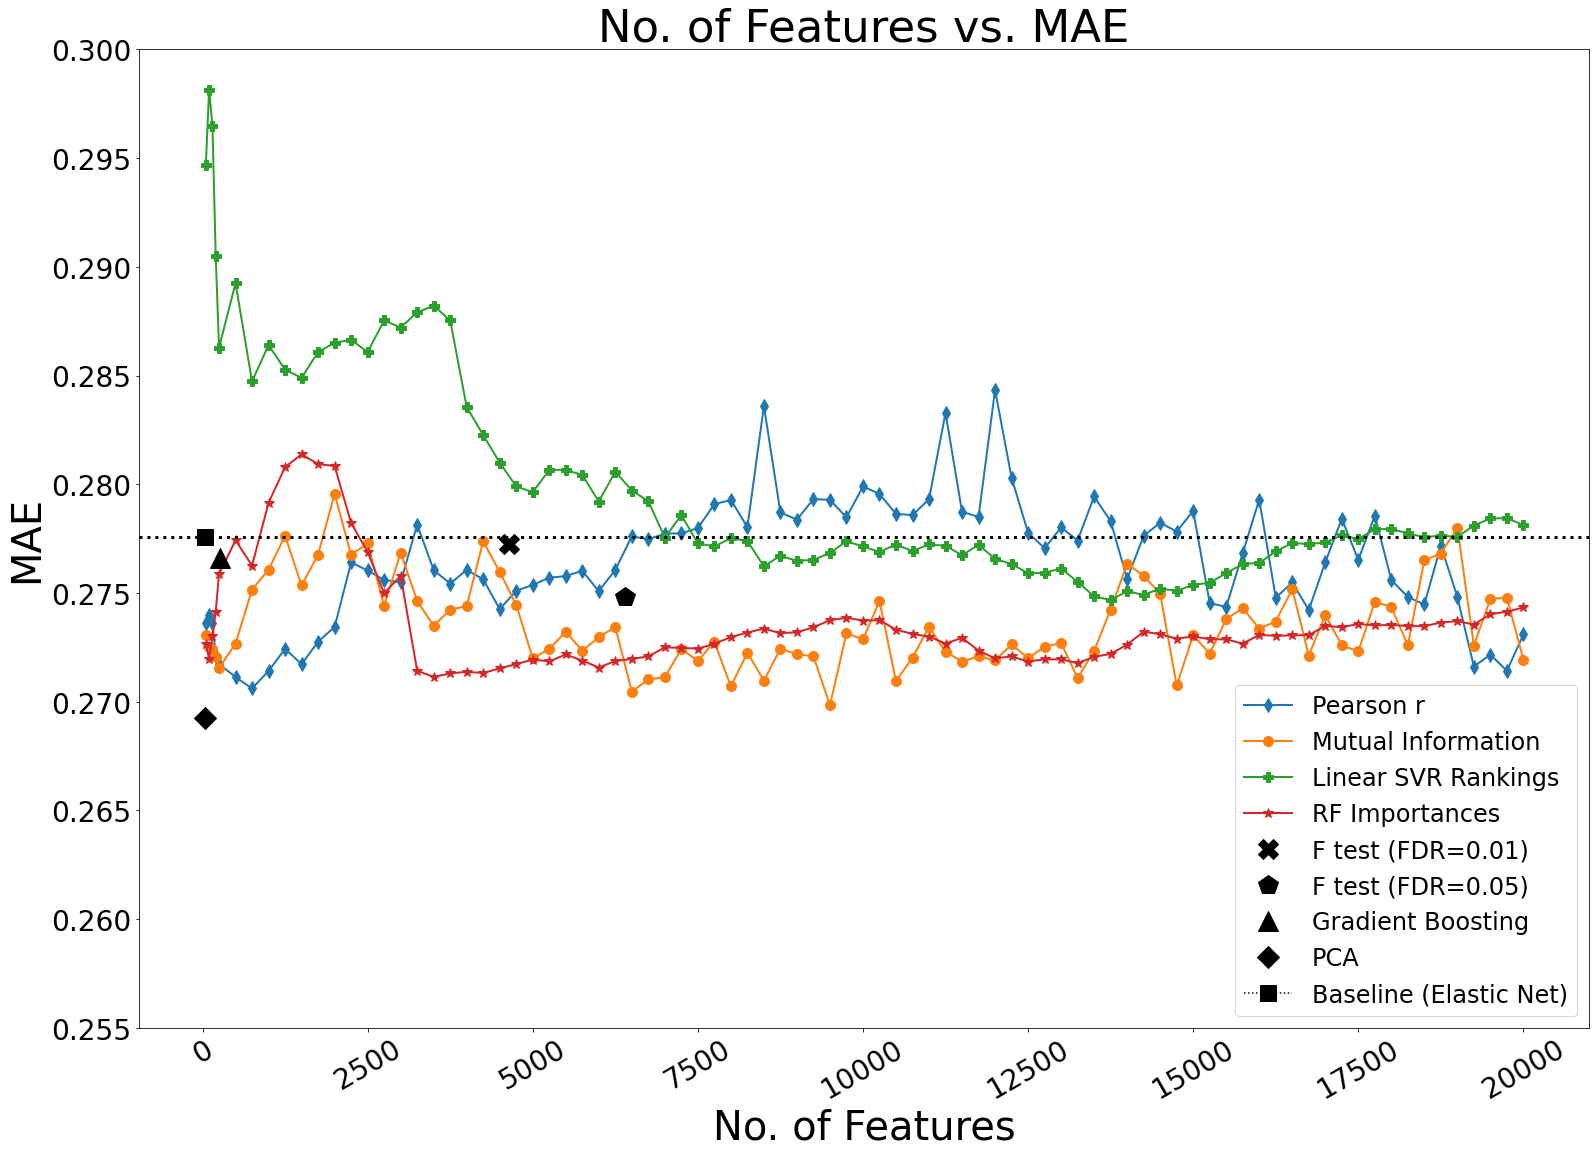

In [22]:
#mae_df.plot(x='Original Features', y=['Pearson r', 'Mutual Information', 'Linear SVR Rankings', 'RF Importances'], linewidth=3) #  'OMP Rankings' 
#mae_df.plot(x='Original Features', y='Pearson r', marker='o', markersize=12, linewidth=3) 
plt.plot(mae_df['Original Features'], mae_df['Pearson r'], marker='d', markersize=10, linewidth=2, label='Pearson r') 
plt.plot(mae_df['Original Features'], mae_df['Mutual Information'], marker='o', markersize=10, linewidth=2, label='Mutual Information') 
plt.plot(mae_df['Original Features'], mae_df['Linear SVR Rankings'], marker='P', markersize=10, linewidth=2, label='Linear SVR Rankings') 
plt.plot(mae_df['Original Features'], mae_df['RF Importances'], marker='*', markersize=10, linewidth=2, label='RF Importances') 

plt.plot(f_test_1_pc_feat, f_test_1_pc_mae, '-kX', label='F test (FDR=0.01)', markersize=20, linestyle="None")
plt.plot(f_test_5_pc_feat, f_test_5_pc_mae, '-kp', label='F test (FDR=0.05)', markersize=20, linestyle="None")
plt.plot(boostaroota_feat, boostaroota_mae, '-k^', label='Gradient Boosting', markersize=20, linestyle="None")
plt.plot(pca_feat, pca_mae, '-kD', label='PCA', markersize=16, linestyle="None")
plt.plot(baseline_feat, baseline_mae, '-ks', label='Baseline (Elastic Net)', markersize=16, linestyle="dotted")


plt.axhline(y=baseline_mae, color='k', linestyle=':', linewidth=3)
plt.title('No. of Features vs. MAE', fontsize=45)
plt.xlabel('No. of Features', fontsize=40)
plt.ylabel('MAE', fontsize=40)
plt.xticks(fontsize=28,  rotation=30); plt.yticks(fontsize=28)
plt.legend(fontsize=24, loc='lower right')
plt.ylim(0.255, 0.3)
#plt.xlim(0000, 6000)

***

## Plot the nested CV Pearson Correlation over the range 0 to 20000 features (step size: 250) for each feature ranking method

In [41]:
corr_dfs = []
for search in searches:
    corr_dfs.append(search[0].groupby('Original Features')['Test Corr Per Run'].mean())
cols = ['Original Features'] + [x[1] for x in searches]
corr_df = pd.concat(corr_dfs, axis=1).reset_index()
corr_df.columns = cols
corr_df.head(75)

f_test_1_pc_corr = rs_ftestfdr_1pc['Test Corr Per Run'].mean()
f_test_1_pc_feat = rs_ftestfdr_1pc['Non-zero Coefs after EN'].mean()
f_test_5_pc_corr = rs_ftestfdr_5pc['Test Corr Per Run'].mean()
f_test_5_pc_feat = rs_ftestfdr_5pc['Non-zero Coefs after EN'].mean()
boostaroota_corr = rs_boostaroota['Test Corr Per Run'].mean()
boostaroota_feat = rs_boostaroota['Non-zero Coefs after EN'].mean()
pca_corr = rs_pca['Test Corr Per Run'].mean()
pca_feat = rs_pca['Non-zero Coefs after EN'].mean()
baseline_corr = rs_baseline['Test Corr Per Run'].mean()
baseline_feat = rs_baseline['Non-zero Coefs after EN'].mean()

In [42]:
f_test_1_pc_feat

4636.6

In [43]:
f_test_5_pc_corr

0.31290741777328446

C:\Users\User\AppData\Local\Temp/ipykernel_13628/2256199701.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-kv" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(f_test_1_pc_feat, f_test_1_pc_corr, '-kv', label='F test (FDR=0.01)', markersize=20, linestyle="None")
C:\Users\User\AppData\Local\Temp/ipykernel_13628/2256199701.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-kp" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(f_test_5_pc_feat, f_test_5_pc_corr, '-kp', label='F test (FDR=0.05)', markersize=20, linestyle="None")
C:\Users\User\AppData\Local\Temp/ipykernel_13628/2256199701.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(boostaroota_feat, boostaroota_corr, '-k^', label='Gra

(0.09, 0.333)

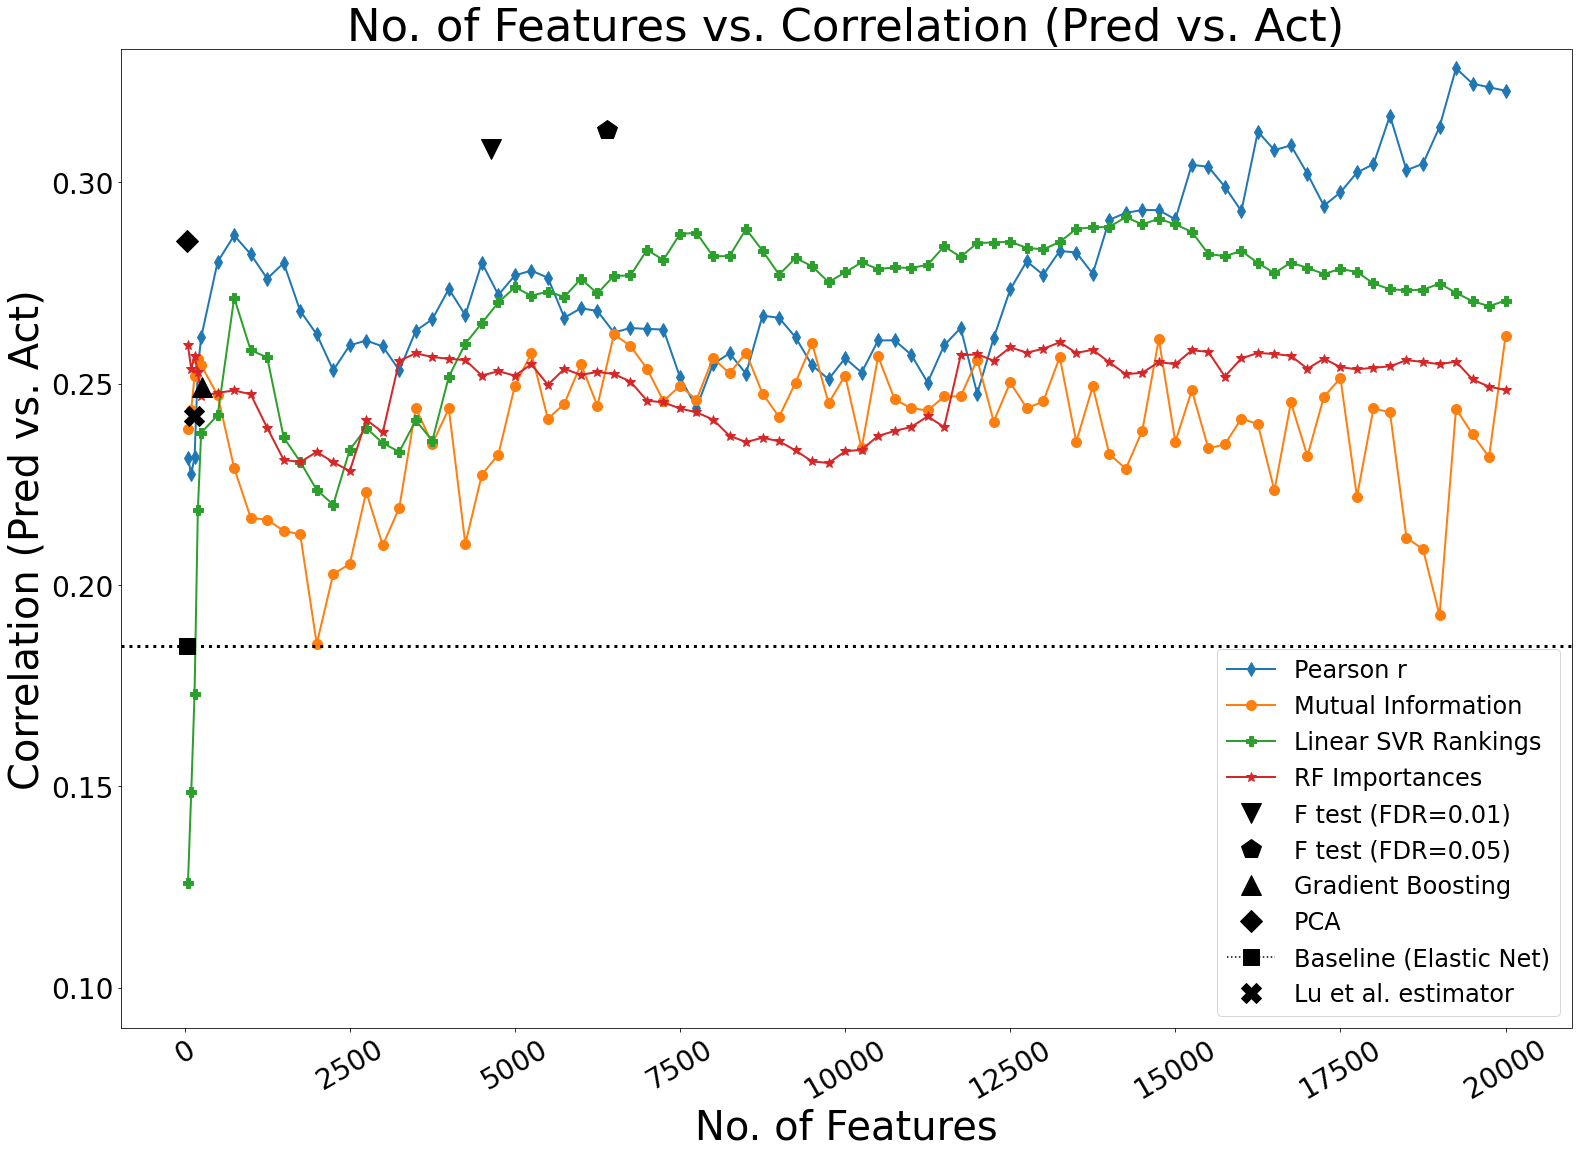

In [44]:
#corr_df.plot(x='Original Features', y=['Pearson r', 'Mutual Information', 'Linear SVR Rankings', 'RF Importances'], linewidth=3) # , 'OMP Rankings'
plt.plot(corr_df['Original Features'], corr_df['Pearson r'], marker='d', markersize=10, linewidth=2, label='Pearson r') 
plt.plot(corr_df['Original Features'], corr_df['Mutual Information'], marker='o', markersize=10, linewidth=2, label='Mutual Information') 
plt.plot(corr_df['Original Features'], corr_df['Linear SVR Rankings'], marker='P', markersize=10, linewidth=2, label='Linear SVR Rankings') 
plt.plot(corr_df['Original Features'], corr_df['RF Importances'], marker='*', markersize=10, linewidth=2, label='RF Importances')

plt.plot(f_test_1_pc_feat, f_test_1_pc_corr, '-kv', label='F test (FDR=0.01)', markersize=20, linestyle="None")
plt.plot(f_test_5_pc_feat, f_test_5_pc_corr, '-kp', label='F test (FDR=0.05)', markersize=20, linestyle="None")
plt.plot(boostaroota_feat, boostaroota_corr, '-k^', label='Gradient Boosting', markersize=20, linestyle="None")
plt.plot(pca_feat, pca_corr, '-kD', label='PCA', markersize=16, linestyle="None")
plt.plot(baseline_feat, baseline_corr, '-ks', label='Baseline (Elastic Net)', markersize=16, linestyle="dotted")
plt.axhline(y=baseline_corr, color='k', linestyle=':', linewidth=3)
# Lu et al. reuslts
plt.plot(140, 0.242, '-kX', label='Lu et al. estimator', markersize=20, linestyle="None")

#plt.plot(f_test_1_pc_feat, f_test_1_pc_corr, '-b^', label='F test (FDR=0.01)', markersize=12)
#plt.plot(f_test_5_pc_feat, f_test_5_pc_corr, '-rs', label='F test (FDR=0.05)', markersize=12)
#plt.plot(boostaroota_feat, boostaroota_corr, '-kD', label='Gradient Boosting', markersize=12)
#plt.plot(pca_feat, pca_corr, '-gs', label='PCA', markersize=12)
#plt.plot(baseline_feat, baseline_corr, '-ms', label='Baseline', markersize=12)
#plt.axhline(y=baseline_corr, color='k', linestyle=':', linewidth=3)
plt.title('No. of Features vs. Correlation (Pred vs. Act)', fontsize=45)
plt.xlabel('No. of Features', fontsize=40)
plt.ylabel('Correlation (Pred vs. Act)', fontsize=40)
plt.xticks(fontsize=28, rotation=30); plt.yticks(fontsize=28)
plt.legend(fontsize=24, loc='lower right')
plt.ylim(0.09, 0.333)

### Results Tables

### Metric 1: MAE

([<matplotlib.axis.XTick at 0x2521ebaa2b0>,
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'F-test (FDR:0.01)'),
  Text(2, 0, 'F-test (FDR: 0.05)'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Mutual Information'),
  Text(5, 0, 'Pearson Correlation'),
  Text(6, 0, 'Linear SVR'),
  Text(7, 0, 'Random Forest'),
  Text(8, 0, 'PCA')])

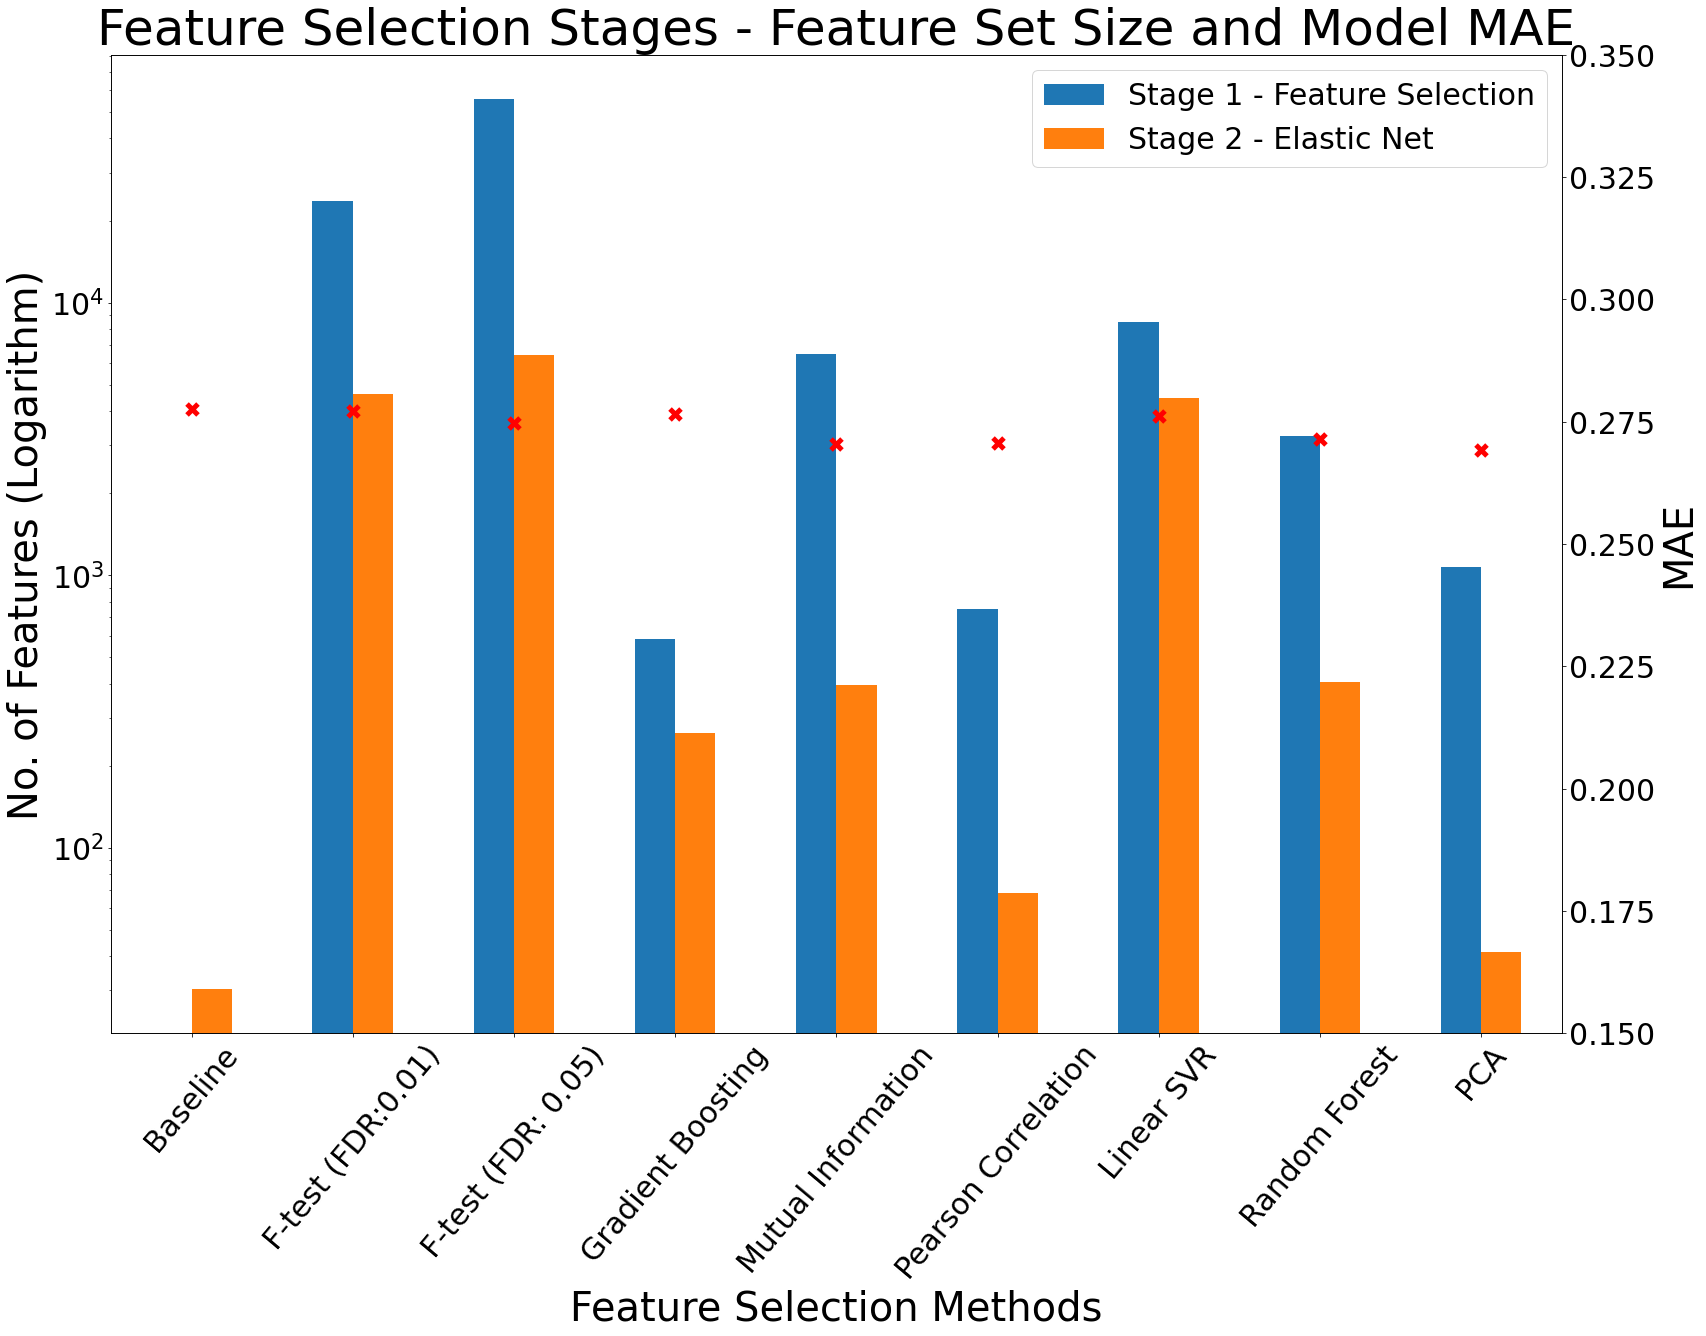

In [67]:
name_map = {"('LinearSVR', 0.0001)": 'Linear SVR', "('baseline', 0.0001)": 'Baseline', "('boostaroota', 0.0001)": 'Gradient Boosting',
            "('f_test_fdr', 0.01)": 'F-test (FDR:0.01)', "('f_test_fdr', 0.05)": 'F-test (FDR: 0.05)',
            "('mutual_info_gain', 0.0001)": 'Mutual Information', "('pca', 0)": 'PCA',
            "('pearson_r', 0.0001)": 'Pearson Correlation', "('random_forest', 0)": 'Random Forest'}
# Set to zero, to stop  stage 1 features appearing for baseline
rs_baseline['Top N Ranked Features'] = 0
best_models = pd.concat([rs_ftestfdr_1pc, rs_ftestfdr_5pc, rs_boostaroota, rs_pca, rs_baseline,
                         rs_20000_rf[rs_20000_rf['Top N Ranked Features'] == 3250],
                         rs_20000_linearSVR[rs_20000_linearSVR['Top N Ranked Features'] == 8500],
                         rs_20000_mig[rs_20000_mig['Top N Ranked Features'] == 6500],
                         rs_20000_pearsonr[rs_20000_pearsonr['Top N Ranked Features'] == 750]])
best_models.rename(columns={'Top N Ranked Features': 'Stage 1 - Feature Selection', 'Non-zero Coefs after EN': 'Stage 2 - Elastic Net'}, inplace=True)

best_models = best_models.groupby('Feat Sel')[['Stage 1 - Feature Selection', 'Stage 2 - Elastic Net', 'Test MAE Per Run']].mean().reset_index()
best_models['Feat Sel'] = best_models['Feat Sel'].map(name_map)
# Re-order rows to put PCA last on graph
best_models = best_models.reindex([1,3,4,2,5,7,0,8,6])
best_models.iloc[:, 0:3].plot(kind='bar')

plt.title('Feature Selection Stages - Feature Set Size and Model MAE', fontsize=50)
plt.xlabel('Feature Selection Methods', fontsize=40)
plt.ylabel('No. of Features (Logarithm)', fontsize=40)

plt.xticks(fontsize=30, rotation=50)
plt.yticks(fontsize=30)

plt.legend(fontsize=30, loc='upper right')
plt.yscale('log')

plt.twinx()
plt.ylabel('MAE', fontsize=40)
plt.yticks(fontsize=30)
plt.scatter(best_models['Feat Sel'], best_models['Test MAE Per Run'], color='red', marker='x', s=120,  linewidth=5)
plt.ylim(0.15, 0.35)
# Stop x-labels from being shown as number - but instead as the actual model labels
plt.xticks([0,1,2,3,4,5,6,7,8], best_models['Feat Sel'])


### Metric 2: Correlation (Predicted vs. Actual)

In [54]:
best_models

,Feat Sel,Stage 1 - Feature Selection,Stage 2 - Elastic Net,Test MAE Per Run
1,Baseline,0.0,30.4,0.277588
3,F-test (FDR:0.01),23684.8,4636.6,0.277255
4,F-test (FDR: 0.05),55749.8,6398.0,0.274814
2,Gradient Boosting,584.4,263.8,0.276592
5,Mutual Information,6500.0,394.0,0.270467
7,Pearson Correlation,750.0,68.4,0.270608
0,Linear SVR,8500.0,4452.8,0.276227
8,Random Forest,3250.0,406.2,0.271426
6,PCA,1072.2,41.4,0.269255


([<matplotlib.axis.XTick at 0x2520be5a880>,
 [Text(0, 0, 'Baseline'),
  Text(1, 0, 'DNAmTL'),
  Text(2, 0, 'F-test (FDR:0.01)'),
  Text(3, 0, 'F-test (FDR: 0.05)'),
  Text(4, 0, 'Gradient Boosting'),
  Text(5, 0, 'Mutual Information'),
  Text(6, 0, 'Pearson Correlation'),
  Text(7, 0, 'Linear SVR'),
  Text(8, 0, 'Random Forest'),
  Text(9, 0, 'PCA')])

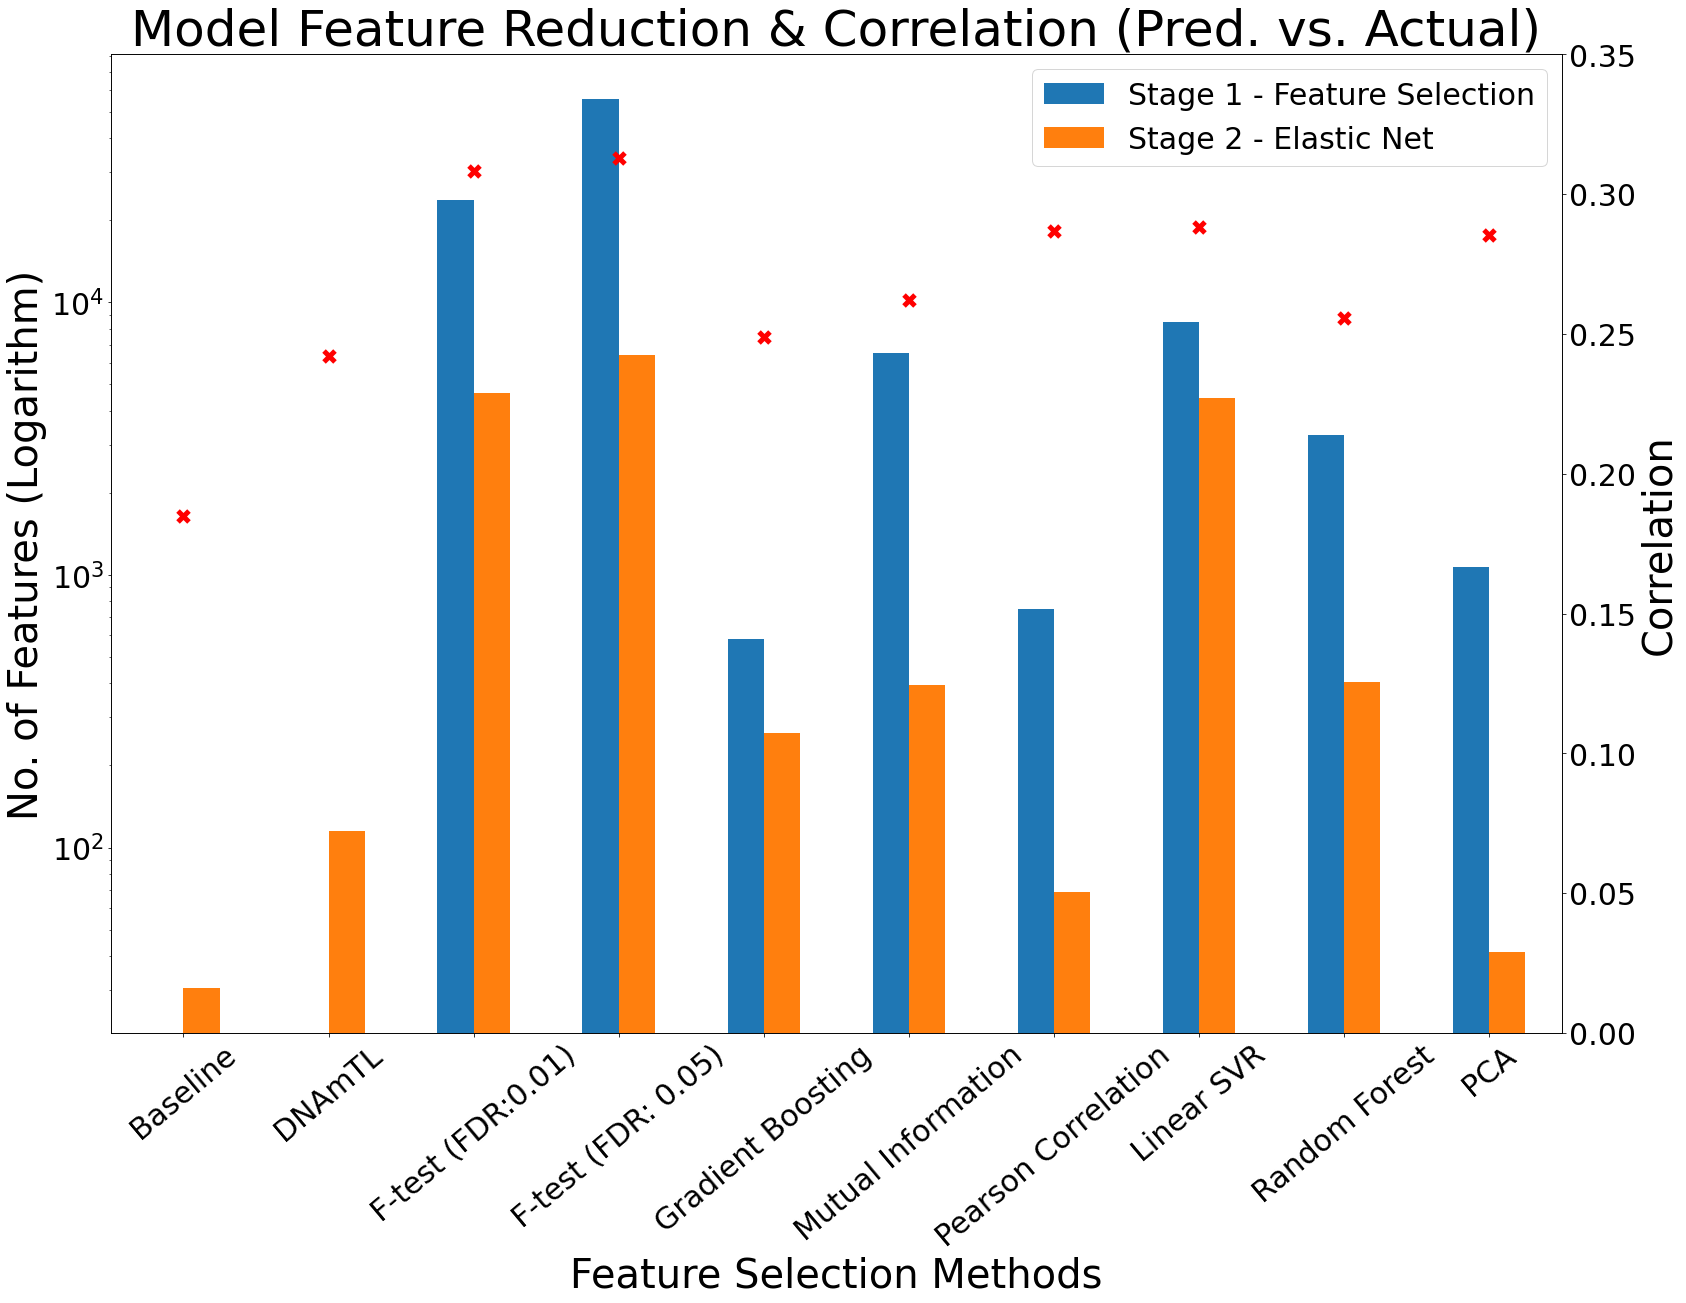

In [65]:
best_models = pd.concat([rs_ftestfdr_1pc, rs_ftestfdr_5pc, rs_boostaroota, rs_pca, rs_baseline,
                         rs_20000_rf[rs_20000_rf['Top N Ranked Features'] == 3250],
                         rs_20000_linearSVR[rs_20000_linearSVR['Top N Ranked Features'] == 8500],
                         rs_20000_mig[rs_20000_mig['Top N Ranked Features'] == 6500],
                         rs_20000_pearsonr[rs_20000_pearsonr['Top N Ranked Features'] == 750]])
best_models.rename(columns={'Top N Ranked Features': 'Stage 1 - Feature Selection', 'Non-zero Coefs after EN': 'Stage 2 - Elastic Net'}, inplace=True)

best_models = best_models.groupby('Feat Sel')[['Stage 1 - Feature Selection', 'Stage 2 - Elastic Net', 'Test Corr Per Run']].mean().reset_index()
best_models['Feat Sel'] = best_models['Feat Sel'].map(name_map)
# Add the Lu et al. DNAmTL results to the dataframe
best_models = best_models.append({'Feat Sel': 'DNAmTL', 'Stage 1 - Feature Selection': 0,
                    'Stage 2 - Elastic Net': 115, 'Test Corr Per Run': 0.242}, ignore_index=True)

# Re-order rows to put PCA last on graph
best_models = best_models.reindex([1,9,3,4,2,5,7,0,8,6])
best_models.iloc[:, 0:3].plot(kind='bar')

plt.title('Model Feature Reduction & Correlation (Pred. vs. Actual)', fontsize=50)
plt.xlabel('Feature Selection Methods', fontsize=40)
plt.ylabel('No. of Features (Logarithm)', fontsize=40)

plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)
plt.legend(fontsize=30, loc='upper right')
plt.yscale('log')

ax = plt.twinx()
plt.ylabel('Correlation', fontsize=40)
plt.yticks(fontsize=30)
#best_models.plot(kind='scatter', x='Feat Sel', y='Test Corr Per Run', s=60, cmap='RdYlGn', ax=ax, use_index=False) 
plt.scatter(best_models['Feat Sel'], best_models['Test Corr Per Run'], color='red', marker='x', s=120,  linewidth=5)
plt.ylim(0, 0.35)
plt.xticks([0,1,2,3,4,5,6,7,8,9], best_models['Feat Sel'])

## Plot the mean number of features remaining in each model with std. error

In [ ]:
df

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 36})
df = pd.concat([rs_ftestfdr_1pc, rs_ftestfdr_5pc, rs_boostaroota, rs_pca, rs_baseline,
                rs_20000_rf[rs_20000_rf['Top N Ranked Features'] == 3250],
                rs_20000_linearSVR[rs_20000_linearSVR['Top N Ranked Features'] == 8500],
                rs_20000_mig[rs_20000_mig['Top N Ranked Features'] == 6500],
                rs_20000_pearsonr[rs_20000_pearsonr['Top N Ranked Features'] == 750]])
df_feat = pd.DataFrame(df.groupby("Feat Sel")['Top N Ranked Features', 'Non-zero Coefs after EN'].agg([np.mean, sem]))

In [ ]:
df_feat.index = ['Linear SVR', 'Baseline', 'Gradient Boosting', 'F-test (FDR:0.01)',
                 'F-test (FDR:0.05)', 'Mutual Information', 'PCA', 'Pearson Correlation',
                 'Random Forest']
df_feat

In [ ]:
df_feat = df_feat.reindex(['Baseline', 'F-test (FDR:0.01)', 'F-test (FDR:0.05)', 'Gradient Boosting',
                 'Mutual Information', 'Pearson Correlation', 'Linear SVR', 'Random Forest', 'PCA'])
df_feat

In [ ]:
plt.errorbar(df_feat.index, df_feat['mean'], yerr=df_feat['sem'], fmt='.k', linewidth=4, markersize=20)
plt.xticks(rotation=45)
#plt.yscale('log')
plt.ylabel('Average No. of Features', fontsize=40)
plt.title('Average no. of Features per Estimator in nested CV analysis')

In [ ]:
df_feat.index